In [2]:
from __future__ import division, print_function

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation
from sklearn import datasets

from groundupml.unsupervised.k_means import KMeans

/home/harrison/anaconda3/envs/gupml-conda/lib/python3.10/site-packages/groundupml-0.0.1-py3.10.egg/groundupml/unsupervised/k_means.py:79: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(clusters)
/home/harrison/anaconda3/envs/gupml-conda/lib/python3.10/site-packages/groundupml-0.0.1-py3.10.egg/groundupml/unsupervised/k_means.py:79: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(clusters)


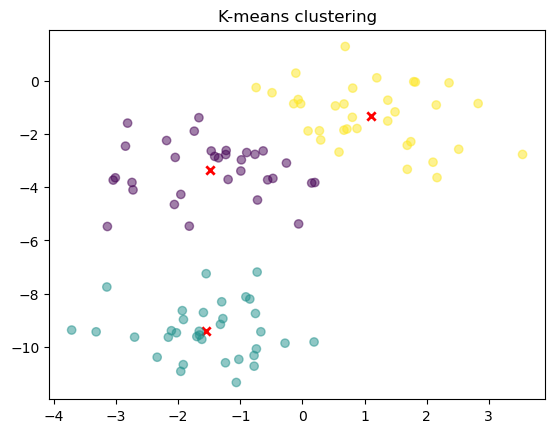

In [28]:
K = 3
INIT_METHOD = 'kpp'
SEED = 2

# Make dataset
np.random.seed(SEED)
X, y = datasets.make_blobs(centers=K)

fig, ax = plt.subplots()
ax.set_title('K-means clustering')


centroids_scatter = ax.scatter([], [], c='red', marker='x', linewidth=2)
data_scatter = ax.scatter(X[:, 0], X[:, 1], c='gray', marker='o', alpha=0.5)

# Initialize centroids for first frame
np.random.seed(SEED)
km = KMeans(k=K, init_method=INIT_METHOD)
km._n_samples, km._n_features = np.shape(X)
centroids = km._initialize_centroids(X)  # Only initialize centroids
centroids_scatter.set_offsets(centroids)

def update(frame):
    # Run k-means up to current frame and get new centroids and labels
    np.random.seed(SEED)
    km = KMeans(k=K, init_method=INIT_METHOD, max_iterations=frame+1)
    labels = km.predict(X)
    centroids = km.centroids
    centroids_scatter.set_offsets(centroids)
    data_scatter.set_array(labels)
    return centroids_scatter, data_scatter

anim = FuncAnimation(fig, update, frames=10, interval=1000, blit=True)
anim.save('k-means_animation.gif', fps=1, writer='imagemagick')

anim